# Handwritten Digit Classification


For this Hands-on, we will use the popular scikit-learn library to build a basic classifier. The MNIST dataset contains images of handwritten digits, and the task is to classify each image into its corresponding digit (0 to 9).

## Import Libraries

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

## Load the Dataset

**Question 1:** Load the train and test subsets of the mnist dataset from Keras

In [2]:
import tensorflow as tf

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()



11490434/11490434 [==============================] - 0s 0us/step


## Data Pre-Processing

**Question 2:**  

*   Adjust the input shape to match the one the model is expecting
*   Normalize the values of the pixels
*   Turn labels into categories using the to_categorical function

In [3]:
# Preprocess the data
X_train = X_train.reshape(-1, 28, 28, 1)/255.0
X_test = X_test.reshape(-1, 28, 28, 1)/255.0
X_train, X_test = np.array(X_train), np.array(X_test)

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)






## Build and train a CNN

**Question 3:** Create a Convolutional neural Network of your choice and be carefyl while you select the following:


*   input shape
*   activation function at the output layer
*   number of output neurons



In [4]:

import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense



# Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Print the model summary
model.summary()






Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

**Question 4:** Compile and train the model. Choose an appropriate loss function, optimizer, and print out the accuracy of the model.

In [5]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))



Epoch 1/10
1875/1875 [==============================] - 61s 32ms/step - loss: 0.1284 - accuracy: 0.9615 - val_loss: 0.0380 - val_accuracy: 0.9865
Epoch 2/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0423 - accuracy: 0.9869 - val_loss: 0.0393 - val_accuracy: 0.9873
Epoch 3/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0293 - accuracy: 0.9905 - val_loss: 0.0349 - val_accuracy: 0.9894
Epoch 4/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0207 - accuracy: 0.9935 - val_loss: 0.0291 - val_accuracy: 0.9912
Epoch 5/10
1875/1875 [==============================] - 67s 35ms/step - loss: 0.0156 - accuracy: 0.9948 - val_loss: 0.0276 - val_accuracy: 0.9916
Epoch 6/10
1875/1875 [==============================] - 63s 33ms/step - loss: 0.0124 - accuracy: 0.9961 - val_loss: 0.0340 - val_accuracy: 0.9900
Epoch 7/10
1875/1875 [==============================] - 55s 30ms/step - loss: 0.0099 - accuracy: 0.9968 - val_loss: 0.0298 -

## Evaluate the Model's performance

**Question 5:** Plot the training and validation accuracy to better understand the performance of the model.

313/313 [==============================] - 3s 10ms/step - loss: 0.0339 - accuracy: 0.9927
Test Accuracy: 0.9926999807357788


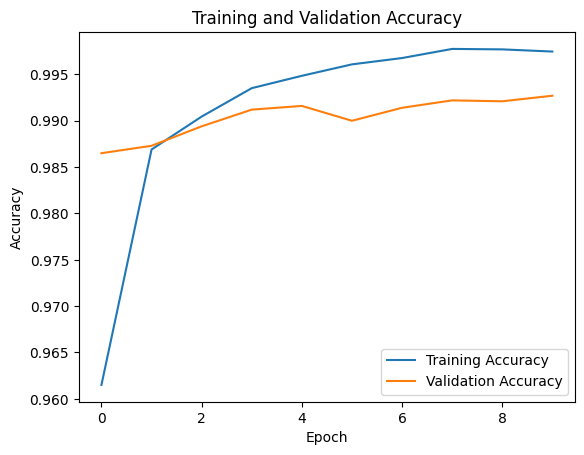

In [6]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
